#Import Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from textblob import TextBlob

#Clean Dataset

In [5]:
df=pd.read_csv('twitter_training.csv', encoding="unicode_escape")
df.columns = ['Tweet_ID', 'Topic', 'Sentiment', 'Tweet_Content']
df.to_csv('twitter_training_new.csv', index=False)

In [6]:
df=pd.read_csv('twitter_training_new.csv',encoding="unicode_escape")
df.head()

,Tweet_ID,Topic,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df = df[df['Topic'] == 'Borderlands']
df = df[df['Sentiment'] != 'Irrelevant']

# Reset the index after dropping rows (optional)
df.reset_index(drop=True, inplace=True)

In [8]:
df.head()

,Tweet_ID,Topic,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df.to_csv('twitter_training_new.csv', index=False)
df = pd.read_csv('twitter_training_new.csv')

#Perform Sentiment Analysis

In [10]:
def get_sentiment(text):
    if isinstance(text, str):
        # Get the sentiment polarity score
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity

        # Classify sentiment based on polarity
        if polarity > 0:
            return 'Positive'
        elif polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'

df['Predicted_Sentiment'] = df['Tweet_Content'].apply(lambda text: get_sentiment(text))
df.to_csv('twitter_training_new.csv', index=False)
print("Sentiment analysis completed and saved to 'twitter_training_new.csv'")

Sentiment analysis completed and saved to 'twitter_training_new.csv'


In [11]:
df.head()

,Tweet_ID,Topic,Sentiment,Tweet_Content,Predicted_Sentiment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,Neutral
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,Neutral
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,Neutral
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,Neutral
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,Neutral


#Accuracy Analysis

In [12]:
df = pd.read_csv('twitter_training_new.csv')

if 'Sentiment' in df.columns and 'Predicted_Sentiment' in df.columns:
    df = df.dropna(subset=['Sentiment', 'Predicted_Sentiment'])

    y_true = df['Sentiment'].tolist()
    y_pred = df['Predicted_Sentiment'].tolist()

    target_names = ['Positive', 'Negative', 'Neutral']

    print(classification_report(y_true, y_pred, target_names=target_names))
else:
    print("Error: Required columns 'Sentiment' or 'Predicted_Sentiment' are missing in the DataFrame.")


              precision    recall  f1-score   support

    Positive       0.41      0.52      0.46       426
    Negative       0.42      0.28      0.33       600
     Neutral       0.65      0.71      0.68      1019

    accuracy                           0.54      2045
   macro avg       0.49      0.50      0.49      2045
weighted avg       0.53      0.54      0.53      2045



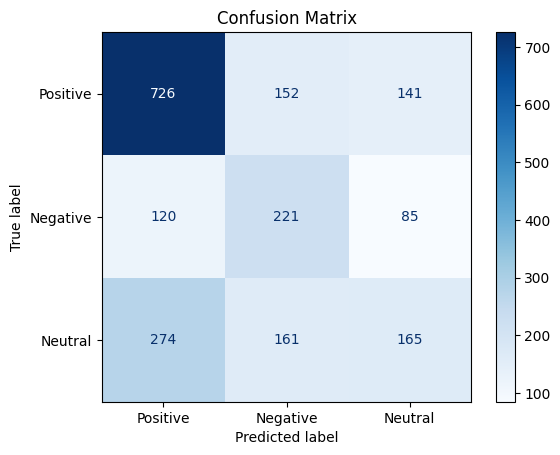

In [13]:
if 'Sentiment' in df.columns and 'Predicted_Sentiment' in df.columns:
    cm = confusion_matrix(y_true, y_pred, labels=target_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title("Confusion Matrix")
    plt.show()
else:
    print("Error: Required columns 'Sentiment' or 'Predicted_Sentiment' are missing in the DataFrame.")

In [14]:
df.to_csv('twitter_training_new.csv', index=False)
df=pd.read_csv('twitter_training_new.csv',encoding="unicode_escape")

#Visualizing The Graphs

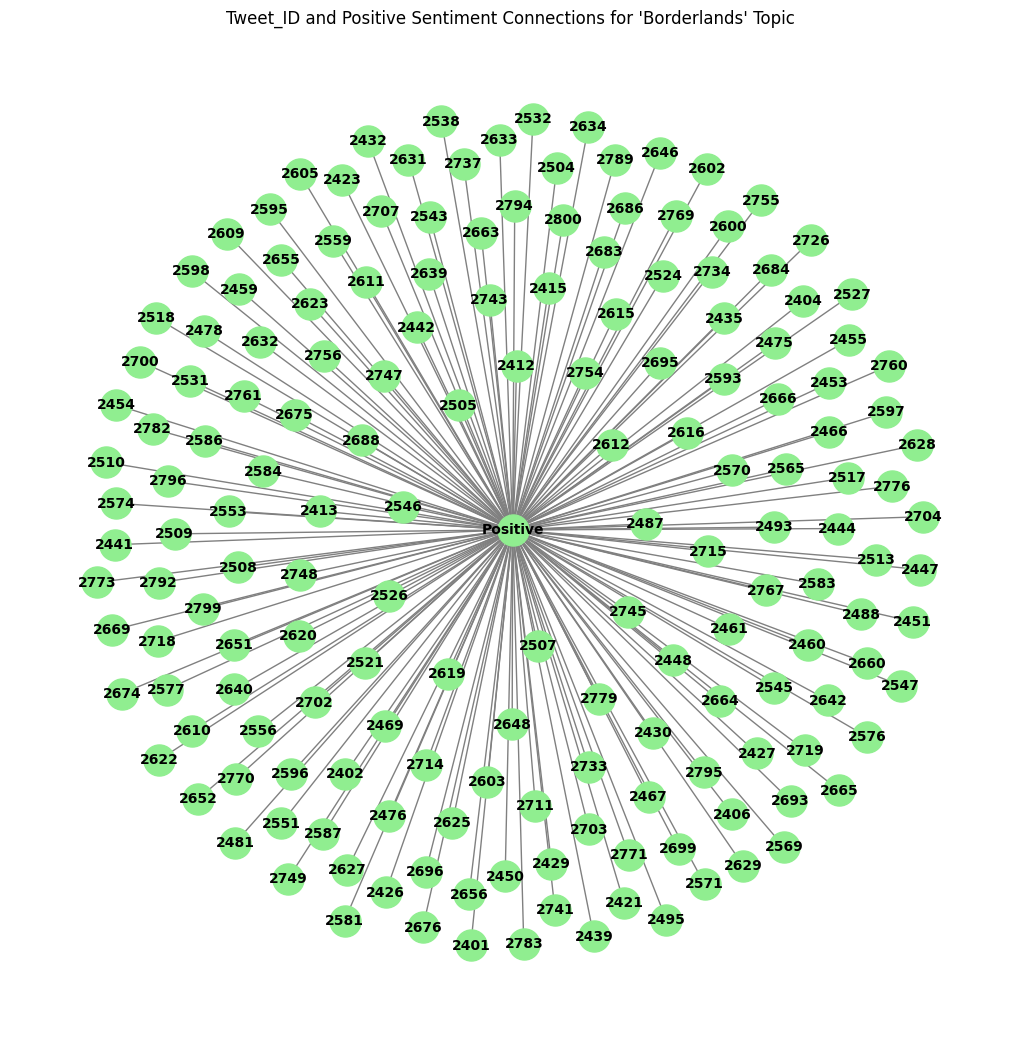

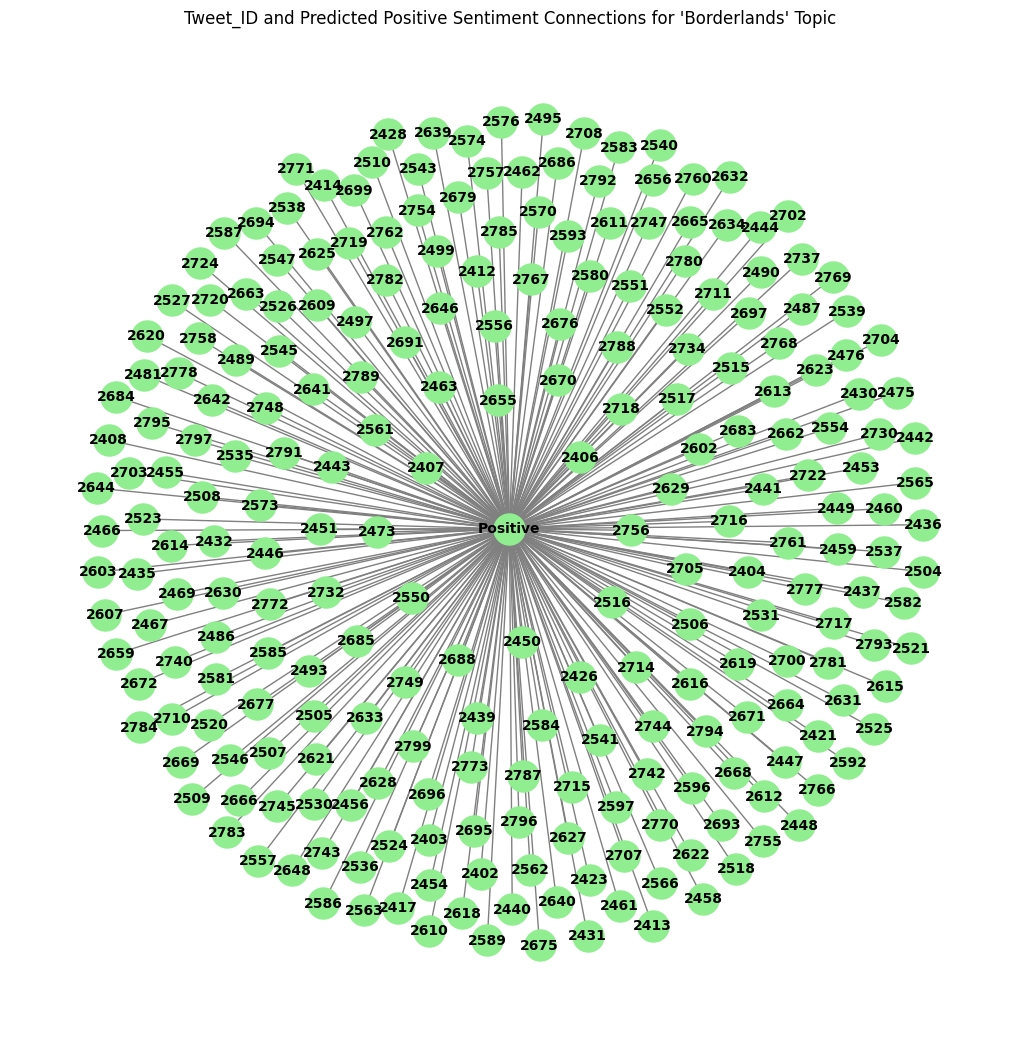

In [15]:
filtered_df01 = df[(df['Topic'] == 'Borderlands') & (df['Sentiment'] == 'Positive')]
filtered_df02 = df[(df['Topic'] == 'Borderlands') & (df['Predicted_Sentiment'] == 'Positive')]

# Actual results

G = nx.Graph()
for _, row in filtered_df01.iterrows():
    tweet_id = row['Tweet_ID']
    sentiment = row['Sentiment']

    if not G.has_node(tweet_id):
        G.add_node(tweet_id, type='tweet_id')
    if not G.has_node(sentiment):
        G.add_node(sentiment, type='sentiment')

    G.add_edge(tweet_id, sentiment)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=65)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightgreen", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Tweet_ID and Positive Sentiment Connections for 'Borderlands' Topic")
plt.show()

# Predicted Results

G = nx.Graph()
for _, row in filtered_df02.iterrows():
    tweet_id = row['Tweet_ID']
    sentiment = row['Predicted_Sentiment']

    if not G.has_node(tweet_id):
        G.add_node(tweet_id, type='tweet_id')
    if not G.has_node(sentiment):
        G.add_node(sentiment, type='sentiment')

    G.add_edge(tweet_id, sentiment)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=65)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightgreen", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Tweet_ID and Predicted Positive Sentiment Connections for 'Borderlands' Topic")
plt.show()

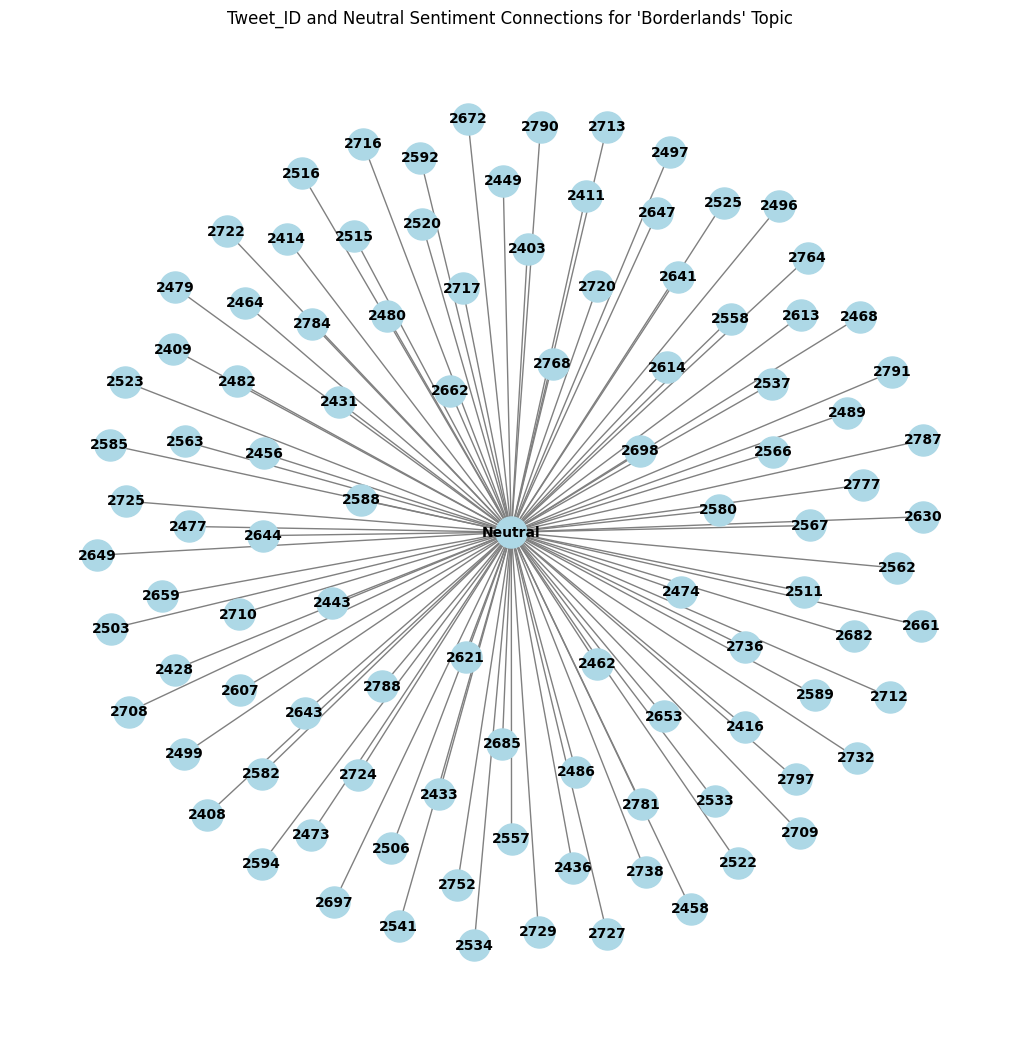

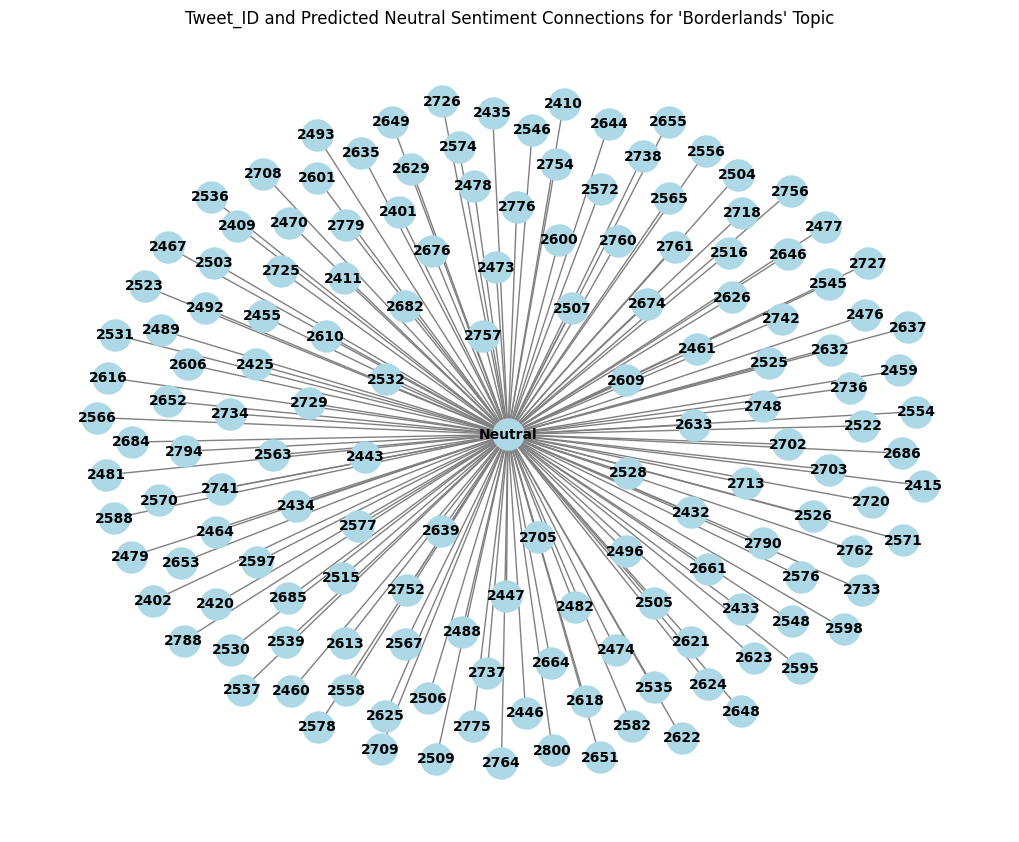

In [16]:
filtered_df01 = df[(df['Topic'] == 'Borderlands') & (df['Sentiment'] == 'Neutral')]
filtered_df02 = df[(df['Topic'] == 'Borderlands') & (df['Predicted_Sentiment'] == 'Neutral')]

# Actual Results

G = nx.Graph()
for _, row in filtered_df01.iterrows():
    tweet_id = row['Tweet_ID']
    sentiment = row['Sentiment']

    if not G.has_node(tweet_id):
        G.add_node(tweet_id, type='tweet_id')
    if not G.has_node(sentiment):
        G.add_node(sentiment, type='sentiment')

    G.add_edge(tweet_id, sentiment)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Tweet_ID and Neutral Sentiment Connections for 'Borderlands' Topic")
plt.show()

# Predicted Results

G = nx.Graph()
for _, row in filtered_df02.iterrows():
    tweet_id = row['Tweet_ID']
    sentiment = row['Predicted_Sentiment']

    if not G.has_node(tweet_id):
        G.add_node(tweet_id, type='tweet_id')
    if not G.has_node(sentiment):
        G.add_node(sentiment, type='sentiment')

    G.add_edge(tweet_id, sentiment)

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Tweet_ID and Predicted Neutral Sentiment Connections for 'Borderlands' Topic")
plt.show()

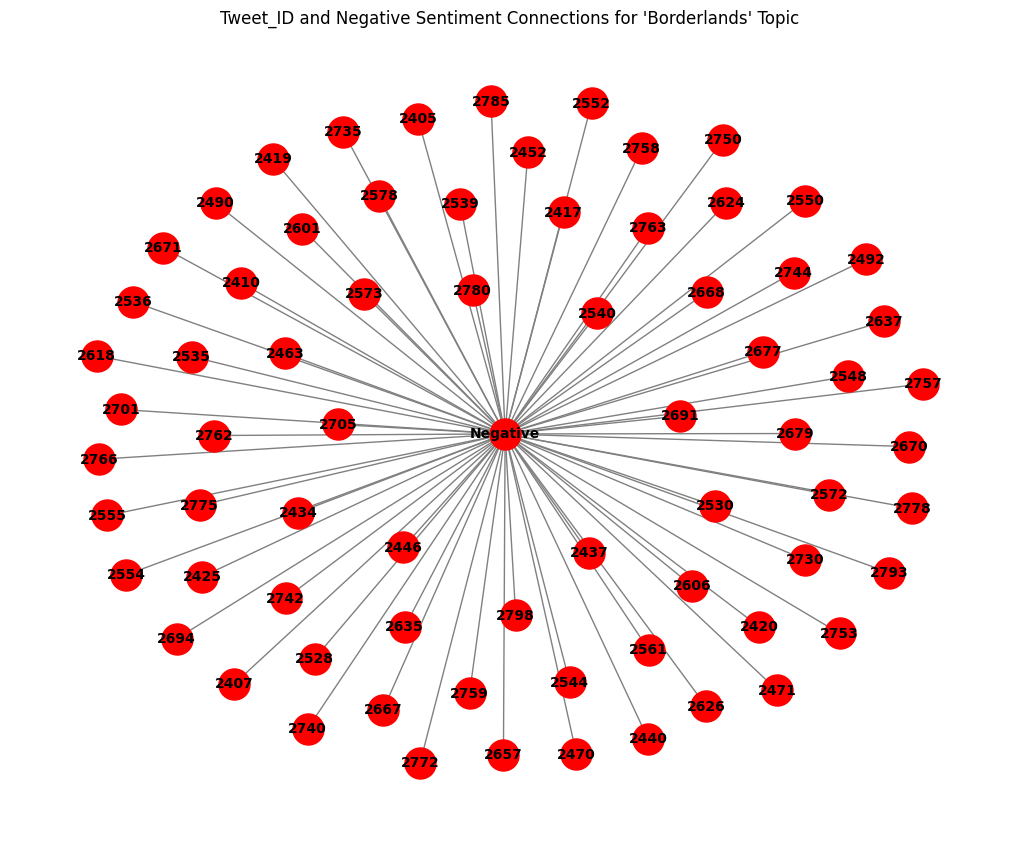

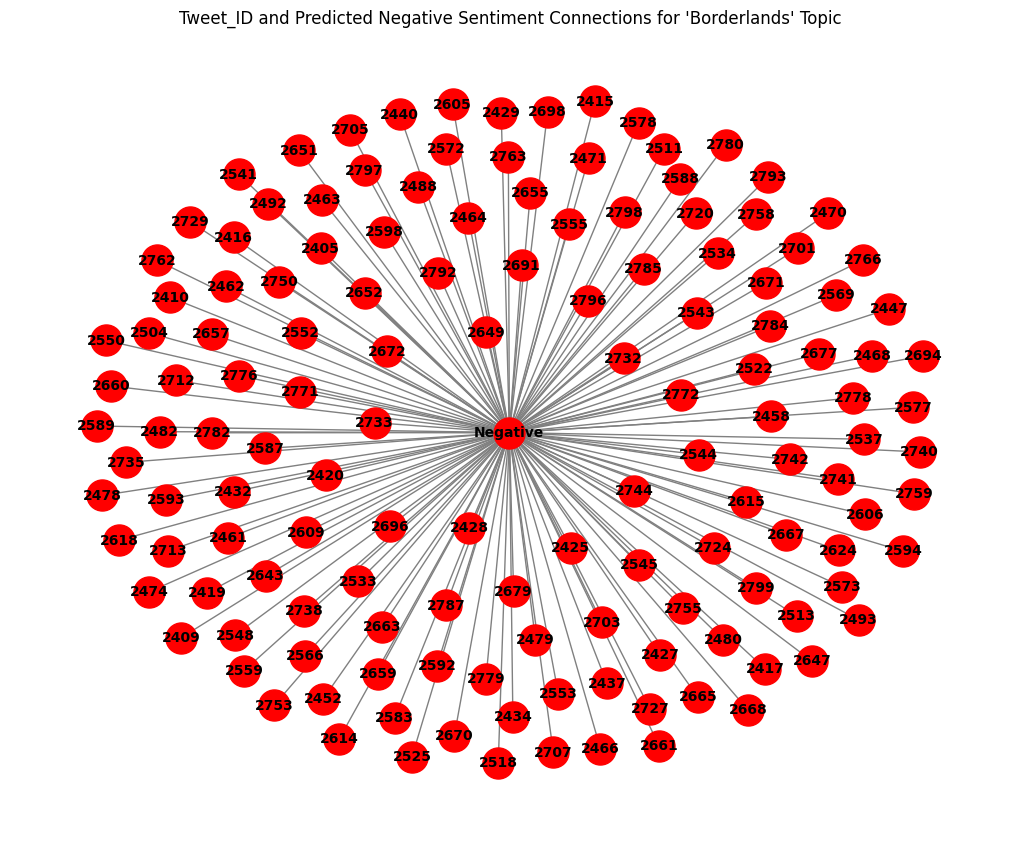

In [17]:
filtered_df01 = df[(df['Topic'] == 'Borderlands') & (df['Sentiment'] == 'Negative')]
filtered_df02 = df[(df['Topic'] == 'Borderlands') & (df['Predicted_Sentiment'] == 'Negative')]

# Actual results

G = nx.Graph()
for _, row in filtered_df01.iterrows():
    tweet_id = row['Tweet_ID']
    sentiment = row['Sentiment']

    if not G.has_node(tweet_id):
        G.add_node(tweet_id, type='tweet_id')
    if not G.has_node(sentiment):
        G.add_node(sentiment, type='sentiment')

    G.add_edge(tweet_id, sentiment)

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="red", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Tweet_ID and Negative Sentiment Connections for 'Borderlands' Topic")
plt.show()

# Predicted Results

G = nx.Graph()
for _, row in filtered_df02.iterrows():
    tweet_id = row['Tweet_ID']
    sentiment = row['Predicted_Sentiment']

    if not G.has_node(tweet_id):
        G.add_node(tweet_id, type='tweet_id')
    if not G.has_node(sentiment):
        G.add_node(sentiment, type='sentiment')

    G.add_edge(tweet_id, sentiment)

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="red", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Tweet_ID and Predicted Negative Sentiment Connections for 'Borderlands' Topic")
plt.show()